#### **População jovem no Brasil: estratégias para o pleno desenvolvimento**
*Autor: Vinícius Raony*  

---


# Análise exploratória de dados - Analisando a Desocupação da População Jovem no Brasil

A população jovem no Brasil, definida pela Lei nº 12.852 de 2013 - Estatuto da Juventude, como pessoas com idade entre 15 (quinze) e 29 (vinte e nove) anos de idade, enfrenta uma série de desafios significativos. Entre esses desafios, a desocupação se destaca como um problema persistente que afeta as perspectivas de futuro desses jovens.

Nesta análise, irei explorar um conjunto de dados que contém informações sobre população por idade e a taxa de desocupação dessa faixa etária no Brasil. A taxa de desocupação é a porcentagem de pessoas na força de trabalho que estão sem emprego.

Ao analisar esses dados, podemos obter insights valiosos sobre as condições de vida e as perspectivas de futuro desses jovens. Isso pode nos ajudar a entender melhor o cenário atual da juventude no Brasil e identificar áreas onde podem ser necessárias intervenções ou políticas públicas adicionais.


<center><img alt="Colaboratory logo" width="35%" src="https://raw.githubusercontent.com/ViniciusRaony/analisando-desocupacao-jovem-no-brasil/main/images/img_desocupacao.jpg"></center>

Através desta análise, espero contribuir para uma melhor compreensão da desocupação da população jovem no Brasil, uma área que vem enfrentando desafios significativos nos últimos anos.






## Obtenção dos Dados
Os dados utilizados nesta análise foram obtidos a partir do site do IBGE. Os dados sobre a desocupação foram retirados da [Pesquisa Nacional por Amostra de Domicílios Contínua](https://sidra.ibge.gov.br/pesquisa/pnadct/tabelas) (PNAD Contínua), que fornece informações detalhadas sobre a desocupação no Brasil.

Além disso, os dados demográficos foram obtidos a partir do [Censo Demográfico de 2022](https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/universo-populacao-por-idade-e-sexo), que fornece informações sobre a população brasileira, incluindo idade e gênero.

No geral, os dados do IBGE já possuem um ótimo tratamento dos dados.

**Para facilitar o acesso, os dados brutos estão na pasta raw desse repostório.**


## Análise Exploratória dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Vamos importar os pacotes necessários e iniciar nossa Análise Exploratória.

**Dicionário das variáveis**

dataset IBGE - Censo 2022

* `Unidade da Federação` - Estado da Federação brasileira
* `0 a 4 anos` - população na faixa etária de 0 a 4 anos
* `...` - população nas faixas etárias subsequentes
* `100 anos ou mais` - população na faixa etária de 100 anos ou mais


dataset PNAD
* `Grupo de Idade` - Estado da Federação brasileira
* `Brasil e Unidade da Federação` - Estado da Federação brasileira + Brasil (total)
* `1º trimestre 2012` - taxa de desocupação do 1º trimestre de 2012
* `...` - taxas de desocupação dos trimestres subsequentes
* `3º trimestre 2023` - taxa de desocupação do 3º trimestre de 2023




In [104]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from IPython.display import display
import seaborn as sns

# clonando repositório onde estão os dados brutos
!mkdir -p data/raw/por-idade
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-desocupacao-jovem-no-brasil/main/raw/tabela9514_censo_ibge_2022.csv -o data/raw/por-idade/tabela9514_censo_ibge_2022.csv
!curl https://raw.githubusercontent.com/ViniciusRaony/analisando-desocupacao-jovem-no-brasil/main/raw/tabela4094_pnad.csv -o data/raw/por-idade/tabela4094_pnad.csv

# definir o valor máximo de colunas como None para exibir todas as colunas
pd.set_option('display.max_columns', None)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6125  100  6125    0     0  28454      0 --:--:-- --:--:-- --:--:-- 28488
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47389  100 47389    0     0   197k      0 --:--:-- --:--:-- --:--:--  197k


In [105]:
# carregar o dataset, o skiprows foi utilizado para eliminar as 5 priemiras linhas desnecessárias e evitar problema de size
df_censo = pd.read_csv('/content/data/raw/por-idade/tabela9514_censo_ibge_2022.csv', encoding='utf-8', delimiter=";", skiprows=5)

# carregar o dataset, o skiprows foi utilizado para eliminar as 3 priemiras linhas desnecessárias e evitar problema de size
df_pnad = pd.read_csv('/content/data/raw/por-idade/tabela4094_pnad.csv', encoding='utf-8', delimiter=";", skiprows=3)

In [106]:
# verificando as dimensões do Dataset
print('Dimensões do Dataset df_censo',
    '\nVariáveis: ',df_censo.shape[1], "\n"
      'Entradas: ', df_censo.shape[0])

display(df_censo.head(2))

# verificando as dimensões do Dataset
print('Dimensões do Dataset df_pnad',
    '\nVariáveis: ',df_pnad.shape[1], "\n"
      'Entradas: ', df_pnad.shape[0])

display(df_pnad.head(2))

Dimensões do Dataset df_censo 
Variáveis:  23 
Entradas:  27


,Unidade da Federação,Forma de declaração da idade,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 24 anos,25 a 29 anos,30 a 34 anos,35 a 39 anos,40 a 44 anos,45 a 49 anos,50 a 54 anos,55 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos,100 anos ou mais
0,Rondônia,Total,113450,117536,117166,122058,124515,126056,125234,127989,123968,106731,95902,84545,67775,50232,34028,21246,13194,6353,2451,620,147
1,Acre,Total,71001,74586,75573,78689,77247,68848,62782,63093,60238,47828,39626,32091,25846,19692,13779,8969,5567,2742,1265,414,142


Dimensões do Dataset df_pnad 
Variáveis:  49 
Entradas:  140


,Grupo de idade,Brasil e Unidade da Federação,1º trimestre 2012,2º trimestre 2012,3º trimestre 2012,4º trimestre 2012,1º trimestre 2013,2º trimestre 2013,3º trimestre 2013,4º trimestre 2013,1º trimestre 2014,2º trimestre 2014,3º trimestre 2014,4º trimestre 2014,1º trimestre 2015,2º trimestre 2015,3º trimestre 2015,4º trimestre 2015,1º trimestre 2016,2º trimestre 2016,3º trimestre 2016,4º trimestre 2016,1º trimestre 2017,2º trimestre 2017,3º trimestre 2017,4º trimestre 2017,1º trimestre 2018,2º trimestre 2018,3º trimestre 2018,4º trimestre 2018,1º trimestre 2019,2º trimestre 2019,3º trimestre 2019,4º trimestre 2019,1º trimestre 2020,2º trimestre 2020,3º trimestre 2020,4º trimestre 2020,1º trimestre 2021,2º trimestre 2021,3º trimestre 2021,4º trimestre 2021,1º trimestre 2022,2º trimestre 2022,3º trimestre 2022,4º trimestre 2022,1º trimestre 2023,2º trimestre 2023,3º trimestre 2023
0,14 a 17 anos,Brasil,"24,8","22,1","20,4","19,6","24,8","22,8","20,8","18,6","22,2","20,9","20,9","21,1","26,3","24,3","26,6","29,0","38,1","38,8","39,8","39,8","45,3","43,1","41,9","39,2","43,8","42,9","40,1","40,4","44,5","42,3","40,7","39,3","43,9","43,1","44,3","42,8","46,6","43,3","40,4","37,2","36,4","33,3","31,7","29,0","33,1","29,8","30,2"
1,14 a 17 anos,Rondônia,"18,3","14,2","16,5","13,5","12,7","13,0","9,8","16,0","12,7","15,1","12,3","12,6","17,6","13,2","18,9","16,8","20,6","16,5","26,4","15,5","26,2","20,4","18,0","19,8","27,4","22,2","29,1","34,9","25,2","14,0","23,4","26,6","35,2",...,...,...,...,...,...,...,...,"20,7","18,6","9,4","4,2","7,1","6,4"


Verificando os tipos de dados, vamos verificar se há alguma incompatibilidade, pois iremos trabalhar com números.

In [107]:
# verificando os tipos do df_censo
df_censo.dtypes

Unidade da Federação            object
Forma de declaração da idade    object
0 a 4 anos                       int64
5 a 9 anos                       int64
10 a 14 anos                     int64
15 a 19 anos                     int64
20 a 24 anos                     int64
25 a 29 anos                     int64
30 a 34 anos                     int64
35 a 39 anos                     int64
40 a 44 anos                     int64
45 a 49 anos                     int64
50 a 54 anos                     int64
55 a 59 anos                     int64
60 a 64 anos                     int64
65 a 69 anos                     int64
70 a 74 anos                     int64
75 a 79 anos                     int64
80 a 84 anos                     int64
85 a 89 anos                     int64
90 a 94 anos                     int64
95 a 99 anos                     int64
100 anos ou mais                 int64
dtype: object

In [108]:
# verificando os tipos do df_pnad, aqui verificamos que os valores estão como string, e teremos que tratar no momento do plot
df_pnad.dtypes

Grupo de idade                   object
Brasil e Unidade da Federação    object
1º trimestre 2012                object
2º trimestre 2012                object
3º trimestre 2012                object
4º trimestre 2012                object
1º trimestre 2013                object
2º trimestre 2013                object
3º trimestre 2013                object
4º trimestre 2013                object
1º trimestre 2014                object
2º trimestre 2014                object
3º trimestre 2014                object
4º trimestre 2014                object
1º trimestre 2015                object
2º trimestre 2015                object
3º trimestre 2015                object
4º trimestre 2015                object
1º trimestre 2016                object
2º trimestre 2016                object
3º trimestre 2016                object
4º trimestre 2016                object
1º trimestre 2017                object
2º trimestre 2017                object
3º trimestre 2017                object


Verificando dados nulos existentes, como podemos verificar, tanto o dataset do censo quanto o pnad estão completos, sem dados nulos.

In [109]:
# verificando os dados nulos
df_censo.isnull().sum()

Unidade da Federação            0
Forma de declaração da idade    0
0 a 4 anos                      0
5 a 9 anos                      0
10 a 14 anos                    0
15 a 19 anos                    0
20 a 24 anos                    0
25 a 29 anos                    0
30 a 34 anos                    0
35 a 39 anos                    0
40 a 44 anos                    0
45 a 49 anos                    0
50 a 54 anos                    0
55 a 59 anos                    0
60 a 64 anos                    0
65 a 69 anos                    0
70 a 74 anos                    0
75 a 79 anos                    0
80 a 84 anos                    0
85 a 89 anos                    0
90 a 94 anos                    0
95 a 99 anos                    0
100 anos ou mais                0
dtype: int64

In [110]:
# verificando os dados nulos
df_pnad.isnull().sum()

Grupo de idade                   0
Brasil e Unidade da Federação    0
1º trimestre 2012                0
2º trimestre 2012                0
3º trimestre 2012                0
4º trimestre 2012                0
1º trimestre 2013                0
2º trimestre 2013                0
3º trimestre 2013                0
4º trimestre 2013                0
1º trimestre 2014                0
2º trimestre 2014                0
3º trimestre 2014                0
4º trimestre 2014                0
1º trimestre 2015                0
2º trimestre 2015                0
3º trimestre 2015                0
4º trimestre 2015                0
1º trimestre 2016                0
2º trimestre 2016                0
3º trimestre 2016                0
4º trimestre 2016                0
1º trimestre 2017                0
2º trimestre 2017                0
3º trimestre 2017                0
4º trimestre 2017                0
1º trimestre 2018                0
2º trimestre 2018                0
3º trimestre 2018   

Como vimos ao analisar o tipo das variáveis, verificamos que as colunas dos trimestres do df_pnad são do tipo `string` e precisamos alterar para float, também verificamos que a coluna `Forma de declaração da idade` do df_censo não tem utilidade para a análise, então iremos tratá-las:

In [111]:
# removendo colunas nao utilizadas
df_censo = df_censo.drop(columns='Forma de declaração da idade')

In [112]:
# selecionando colunas para transformar em float
cols_to_exclude = ['Grupo de idade', 'Brasil e Unidade da Federação']
cols_to_convert = [col for col in df_pnad.columns if col not in cols_to_exclude]

# substituindo vírgulas por pontos, '-' por '0' e '...' por '0'
for col in cols_to_convert:
    df_pnad[col] = df_pnad[col].str.replace(',', '.').replace('-', '0').replace('...', '0')

# convertendo as colunas para float
for col in cols_to_convert:
    df_pnad[col] = df_pnad[col].astype(float)

Após alterar o formato, vamos verificar informações referentes a quantidade a população total do Brasil em 2022, bem como dos jovens, que é o foco da nossa análise, para isso será utilizado o dataset do Censo.

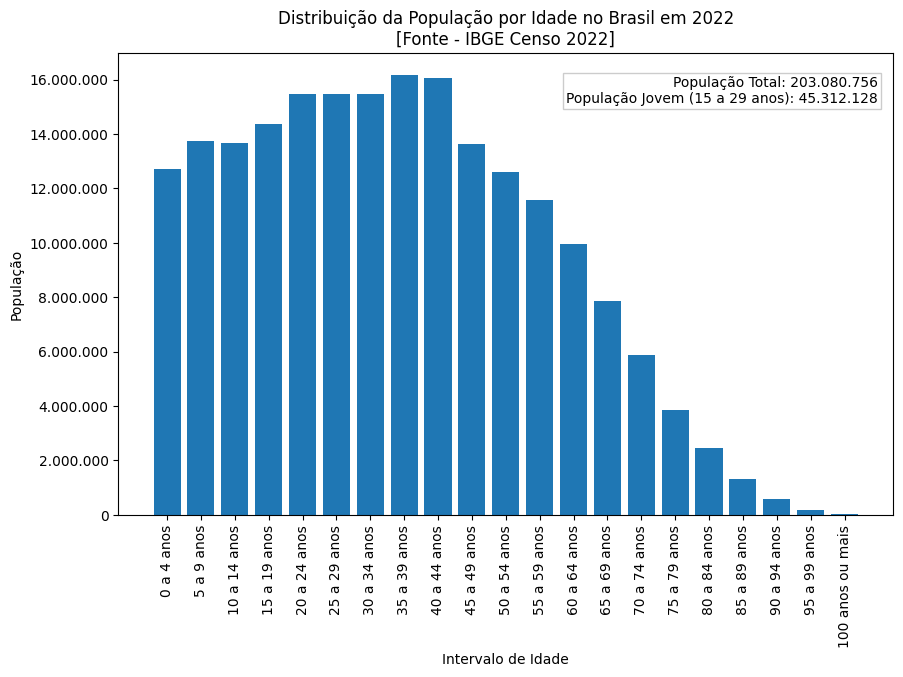

In [116]:
# selecionar apenas as colunas numéricas
dados_numericos = df_censo.select_dtypes(include=[np.number])

# somando os valores de cada intervalo de idade para todos os estados
data = dados_numericos.sum()

# calculando a população total para inserir na legenda
pop_total = data.sum()

# calculando a população jovem (15 a 24 anos)
pop_jovem = data['15 a 19 anos'] + data['20 a 24 anos'] + data['25 a 29 anos']

# formatando os números para o formato brasileiro
pop_total_str = f'{pop_total:,.0f}'.replace(',', ' ').replace('.', ',').replace(' ', '.')
pop_jovem_str = f'{pop_jovem:,.0f}'.replace(',', ' ').replace('.', ',').replace(' ', '.')

# criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(data.index, data.values)

# formatando os rótulos do eixo y para mostrar números no formato brasileiro
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', ' ').replace('.', ',').replace(' ', '.'))
ax.yaxis.set_major_formatter(formatter)

# adicionando as informações da população total e da população jovem no gráfico
info = f'População Total: {pop_total_str}\nPopulação Jovem (15 a 29 anos): {pop_jovem_str}'

# adicionando um retângulo ao redor do texto
textbox = ax.text(0.98, 0.95, info, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right',
                  bbox=dict(facecolor='none', edgecolor='0.8', boxstyle='square,pad=0.2'))

plt.xlabel('Intervalo de Idade')
plt.ylabel('População')
plt.title('Distribuição da População por Idade no Brasil em 2022\n[Fonte - IBGE Censo 2022]')
plt.xticks(rotation=90) # rotação do texto  no eixo x
plt.show()

Tendo como base a Lei nº 12.852 de 2013 - Estatuto da Juventude, a qual define a população jovem do Brasil como pessoas com idade entre 15 e 29 anos, pudemos verificar que:

* População total do Brasil em 2022: 203.080.756
* População jovem em 2022: 45.312.128, o que representa 21.31% da população total.

Agora, vamos buscar trazer um recorte da Desocupação do Jovem, para isso será utilizado o dataset do Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínuo).

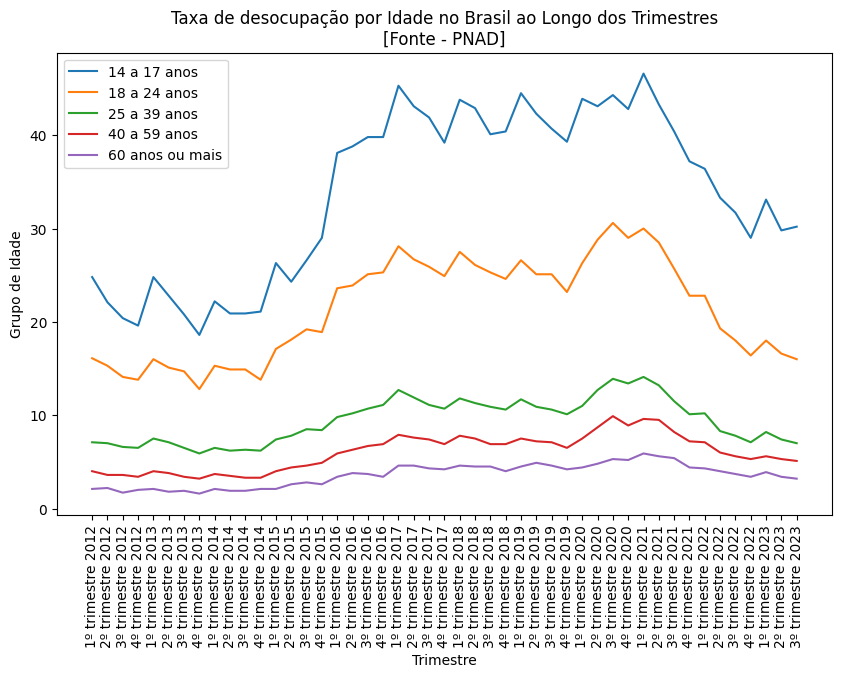

In [118]:
# selecionando apenas as linhas onde 'Brasil e Unidade da Federação' é igual a 'Brasil'
dados_brasil = df_pnad[df_pnad['Brasil e Unidade da Federação'] == 'Brasil'].copy()

# definindo o 'Grupo de idade' como índice
dados_brasil.set_index('Grupo de idade', inplace=True)

# Removendo a coluna 'Brasil e Unidade da Federação'
dados_brasil.drop(columns='Brasil e Unidade da Federação', inplace=True)

# criando o gráfico de linhas
plt.figure(figsize=(10, 6))
for grupo in dados_brasil.index:
    plt.plot(dados_brasil.columns, dados_brasil.loc[grupo], label=grupo)
plt.xlabel('Trimestre')
plt.ylabel('Grupo de Idade')
plt.title('Taxa de desocupação por Idade no Brasil ao Longo dos Trimestres\n[Fonte - PNAD]')
plt.xticks(rotation=90)
plt.legend()
plt.show()

O dado acima nos mostra que a taxa de desocupação é alta na faixa etária dos Jovens ao longo dos trimestres.

O ponto de existir uma alta taxa de desocupação nas faxas etárias '14 a 17 anos' e '18 a 24 anos' nos fez pensar num recorte da Desocupação do Jovem por UF no ano de 2022 do dataset pnad, para isso vamos tirar uma média do '2º trimestre 2022', '3º trimestre 2022' e '4º trimestre 2022', o 1º trimestre de 2022 não será considerado por não existir dados para UFs.


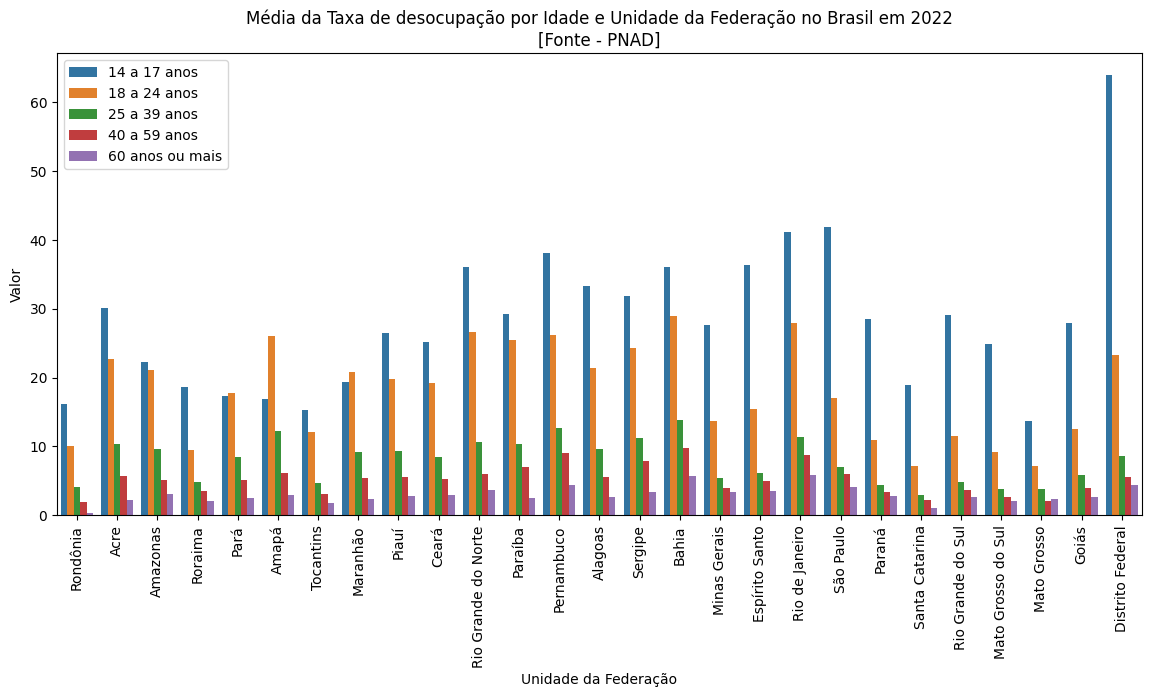

In [119]:
# selecionando apenas as linhas onde 'Brasil e Unidade da Federação' não é igual a 'Brasil'
dados_estados = df_pnad.loc[df_pnad['Brasil e Unidade da Federação'] != 'Brasil'].copy()

# calculando a média dos trimestres de 2022
dados_estados.loc[:, 'Média 2022'] = dados_estados[['2º trimestre 2022', '3º trimestre 2022', '4º trimestre 2022']].mean(axis=1)

# selecionando as colunas necessárias
dados_estados = dados_estados[['Grupo de idade', 'Brasil e Unidade da Federação', 'Média 2022']]

# meltando os dados para que cada linha seja um único ponto de dados
dados_melt = dados_estados.melt(id_vars=['Grupo de idade', 'Brasil e Unidade da Federação'], var_name='Trimestre', value_name='Valor')

# criando o gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x='Brasil e Unidade da Federação', y='Valor', hue='Grupo de idade', data=dados_melt)
plt.xlabel('Unidade da Federação')
plt.ylabel('Valor')
plt.title('Média da Taxa de desocupação por Idade e Unidade da Federação no Brasil em 2022\n[Fonte - PNAD]')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Na análise do ano de 2022, utilizando a Unidade da Federação (UF) como referência, observamos que os dados referentes ao grupo de idade de 14 a 17 anos são particularmente notáveis. Nessa faixa etária, muitos jovens estão em um ponto crucial de suas vidas, fazendo a transição entre a educação e o emprego.

No entanto, a interpretação desses dados pode ser complexa. Por exemplo, uma taxa de desocupação mais baixa, como a observada em Rondônia, pode ter várias interpretações.

## Conclusão

Em 2022, o Brasil tinha 45.312.128 jovens, representando 21.31% da população total, segundo o IBGE. A análise dos dados demográficos revelou que a taxa de desocupação entre esses jovens é um problema significativo, especialmente nas faixas etárias de 14 a 17 anos e 18 a 24 anos. A interpretação desses dados pode ser complexa, com taxas de desocupação variando significativamente entre diferentes UFs.

Por exemplo, uma taxa de desocupação mais baixa, como a observada em Rondônia na faixa etária de 14 a 17 anos, pode ter várias interpretações. Pode ser vista como positiva se for resultado de jovens se concentrando em seus estudos de nível técnico para entrada no mercado de trabalho, ou preocupante se for resultado de jovens sendo forçados a trabalhar devido a circunstâncias econômicas difíceis. Em contraste, em locais como o Distrito Federal, onde a taxa de desocupação é alta entre os jovens de 14 a 17 anos, isso pode indicar que os jovens estão mais focados em seus estudos.

Portanto, ao interpretar esses resultados, é crucial considerar o contexto mais amplo, incluindo fatores como taxas de matrícula escolar, níveis de renda e políticas de assistência social. Em resumo, esses dados oferecem uma visão valiosa da taxa de desocupação entre os jovens no Brasil, destacando a necessidade de uma compreensão mais profunda dos fatores subjacentes que contribuem para essas taxas de desocupação. Com essa compreensão, podemos trabalhar para desenvolver políticas e programas que ajudem a apoiar os jovens em sua transição para a força de trabalho.

## Sugestão de Trabalhos Futuros

*   Análise a Nível Municipal: Embora a análise a nível de UF e idade seja extremamente útil, um recorte a nível municipal pode revelar tendências e desafios específicos que podem não ser visíveis em uma análise mais ampla
*   Comparação entre Regiões Urbanas e Rurais: A desocupação pode variar significativamente entre áreas urbanas e rurais.
*   Impacto da Educação na Desocupação: Uma análise do impacto do nível de educação na desocupação pode ser útil.
*   Análise do Tipo de Atividade Econômica: A desocupação pode ser influenciada pelo tipo de atividade econômica predominante em cada UF.
*   Impacto da Economia Local na Desocupação: Além do tipo de atividade econômica, a saúde geral da economia local pode influenciar as taxas de desocupação. UFs com economias mais fortes podem oferecer mais oportunidades de emprego para os jovens.